 Auth: Mawaba P. DAO

 02/07/2021

 Florida Institute of Technology
 
 Digital Image Processing: ECE5256 (Dr. Kozaitis)


Proj 2 write up:
        
        In part 1 of this project we read an image using cv2 and plot its hisogram. Then the image is enhanced using the following transformation $s=cr^v$. 
        The final values of constants $c$ and $v$ are obtained by attempting various value until the result of the enhancement is satisfactory. 
        Lastly, the histogram of the enhanced image is plotted.
        In part 2 the enhancement is performed using the CDF equalizatin technique discussed in class.
        The CDF's and histogram of the image are both plotted before and after the enhancement to show the improvement.
        In part 3, a noisy version of the original image is generated. The noisy image is "smoothed" using a low-pass filter with a kernel size of 3.
        Then the sobel gradient of the smoothed image is computed in order to enhance the edges in the image.
        In part 4 we are given a plots and a general form for a smooth intensity transformation function. From the plots and the general form
        we find the specific funtion for each transformation. For the last problem of part 4, the image from problem 3.7 in the text is reconstructed. 
        From the now digital image we find the unormalized and normalized histograms programatically.

In [20]:
import matplotlib.pyplot as plt
# from PIL import Image
import numpy as np
import cv2
from scipy import signal

In [21]:
#Funtions used in this project
def e(x):
    return np.exp(x)

def ln(x):
    return np.log(x)

def expTrans(r,alpha=3,beta=4):
    s = np.zeros(r.shape[0])
    for i in range(r.shape[0]):
        s[i] = beta*(1-np.exp(-alpha*(r[i]**2)))
    return s

def cdfEq(img, levels, hist):
    MN = img.shape[0]*img.shape[1]
    L = len(levels)
    n = []
    k=0
    img2 = np.zeros((img.shape[0], img.shape[1]))
    s = np.zeros(len(levels[:-1]))

    for r in levels[:-1]:
        rj = hist[k]/MN
        s[k] = (L-1)*rj
        s_ = (L-1)*np.sum(s)
        idx = np.where(img==int(r))
        rows = idx[0]
        cols = idx[1]
        img2[[rows],[cols]] = int(s_)
        k+=1

    return img2

def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

def intensity_sale(grayscale_array, max_val):
    return ((grayscale_array - grayscale_array.min()) * (1/(grayscale_array.max() - grayscale_array.min()) * max_val)).astype('uint8')

def sobelGradient(myImg):
    sobelx = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])
    sobely = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    gx = signal.convolve2d(myImg, sobelx, boundary='symm', mode='same')
    gy = np.abs(signal.convolve2d(myImg, sobely, boundary='symm', mode='same'))
    gx = np.square(gx)
    gy = np.square(gy)
    return np.sqrt(gx+gy)

def genNoisyImg(N, img, sigma=10, mu=0):
    rows = img.shape[0]
    cols = img.shape[1]
    noisy_imgs = np.zeros((rows, cols, N))
    # print(noisy_imgs[0,:,:])
    for x in range(N):
        noise = sigma * np.random.randn(rows, cols) + mu
        noisy_imgs[:,:,x] = img+noise
        # print(noise)
    return noisy_imgs

# 1 - Image Enhacement

Please change the image path below to an image on your machine if your run into issues.

In [22]:
imgPath = "./imgs/the-martian-mars-in-movies.jpg"

Histogram of OG image:


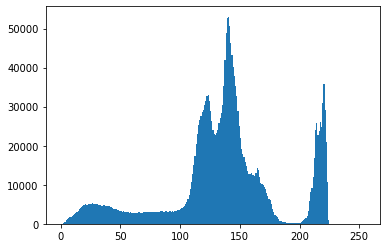

In [23]:
img = cv2.imread(imgPath, 0)
hist,levels = np.histogram(img.ravel(),255,[0,255])
print('Histogram of OG image:')
plt.hist(img.ravel(),255,[0,255]); plt.show()

OG image:


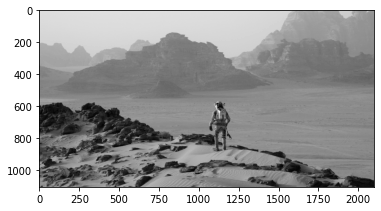

Enhanced image:


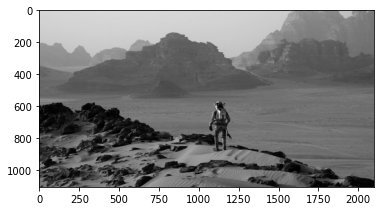

In [24]:
img = cv2.imread(imgPath, 0)
print('OG image:')
plt.imshow(img, cmap="gray")
plt.show()
if not img.flags.writeable:
    img.flags.writeable = True
c = 0.11
v = 1.4
for r in levels:
    s = c*(r**v)
    idx = np.where(img==int(r))
    rows = idx[0]
    cols = idx[1]
    img[[rows],[cols]] = int(s)
print('Enhanced image:')
plt.imshow(img, cmap="gray")

The values of $c$ and $v$, in the code above were obtained by trying different values until visually noticing a better contrast in the enhanced image.

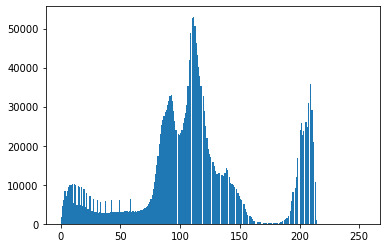

Histogram of enhanced image:


In [25]:

plt.hist(img.ravel(),255,[0,255]); plt.show()
print('Histogram of enhanced image:')

# 2- Histogram Equalization

## *a*) Display an image

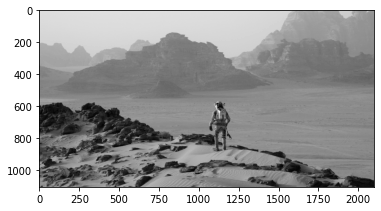

In [26]:
img = cv2.imread(imgPath, 0)
plt.imshow(img, cmap="gray")
# print(np.max(img))

## b) Plot of its hisogram

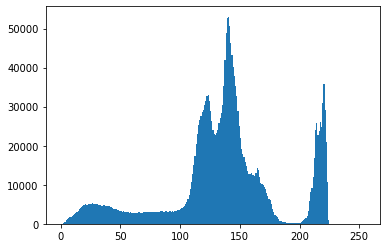

In [27]:
plt.hist(img.ravel(),255,[0,255]); plt.show()

## c) Plot of the histogram-equalization transformation function (CDF of original image)

Text(0.5, 1.0, 'CDF of original image')

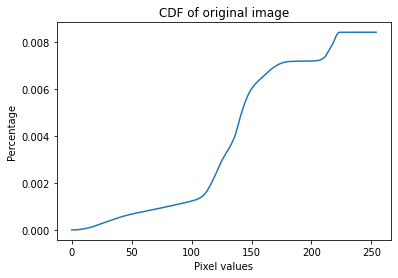

In [28]:
#evaluate the cumulative
cumulative = np.cumsum(hist)
plt.plot(levels[:-1], cumulative/np.sum(cumulative))
plt.xlabel('Pixel values')
plt.ylabel('Percentage')
plt.title('CDF of original image')

## d) Histogram Equalized image

OG image


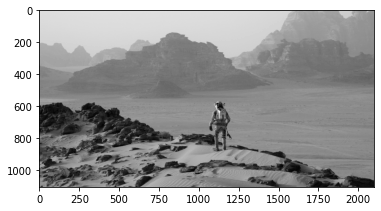

Equalized image


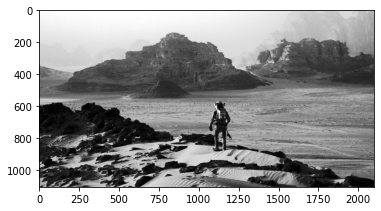

In [29]:
img = cv2.imread(imgPath, 0)
img2 = np.zeros((img.shape[0], img.shape[1]))

img2 = cdfEq(img, levels, hist)

print('OG image')
plt.imshow(img, cmap="gray")
plt.show()
print('Equalized image')
plt.imshow(img2, cmap="gray")

The cell above shows the difference between the OG image and a CDF equalized image. Notice that it is a lot easier to see the pattern in the sand on the equalied image.

## e) Histogram of histogram-equalized image

Histogram of equlized image:


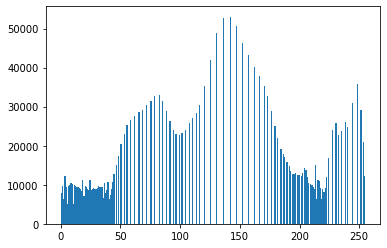

In [30]:
img3 = intensity_sale(img2, 255)
print('Histogram of equlized image:')
plt.hist(img3.ravel(),255,[0,255]); plt.show()

Text(0.5, 1.0, 'CDF of equalized image')

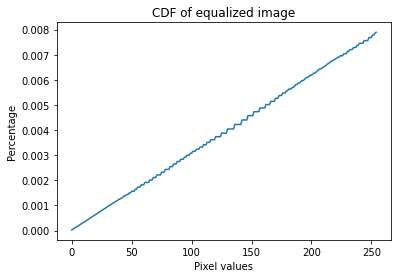

In [31]:
hist,levels = np.histogram(img3.ravel(),255,[0,255])
cumulative = np.cumsum(hist)
plt.plot(levels[:-1], cumulative/np.sum(cumulative))
plt.xlabel('Pixel values')
plt.ylabel('Percentage')
plt.title('CDF of equalized image')

The close to linear CDF of the equalized image indicates that pixel values are more uniformly distributed.

# 3 - Spatial Filtering

## a) Noisy image

Noisy image:


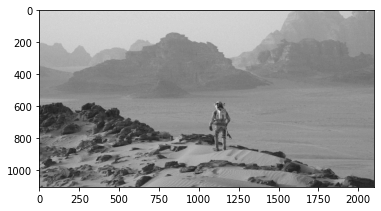

In [32]:
#a
noisy_img = genNoisyImg(1, img, sigma=10, mu=0)
noisy_img = np.average(noisy_img, axis=2)
print('Noisy image:')
plt.imshow(noisy_img, cmap='gray')

## b) Sobel Edge Detector

Edges detection on noisy image


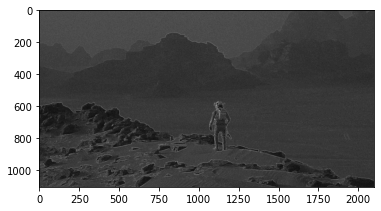

In [33]:
#b
g = sobelGradient(noisy_img) #See function definition at the top
print('Edges detection on noisy image')
plt.imshow(noisy_img+g, cmap="gray")

## c) Sobel Edge detector on smoothed image

Smoothed image:


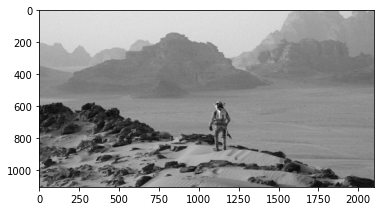

Edge detection of smoothed image:


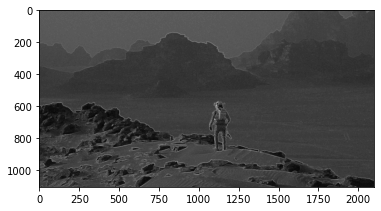

In [34]:
#c
ksize = 3
kernel = np.ones((ksize,ksize),np.float32)/ksize**2
dst = cv2.filter2D(noisy_img,-1,kernel)
print('Smoothed image:')
plt.imshow(dst, cmap="gray")
plt.show()
print('Edge detection of smoothed image:')
g = sobelGradient(dst)
plt.imshow(dst+g, cmap="gray")
# plt.imshow()


Notice the better contrast in this last image than in the one without filtering. This further highlightes the edges in white.

# 4. 3.2 (b),(c), 3.7

## 3.2 (b)

The function in figure B has the following form:
$$
\begin{equation*}
s = T(r) = \beta(1-e^{-\alpha r^2 })
\end{equation*}
$$
This is illustrated in the plow below

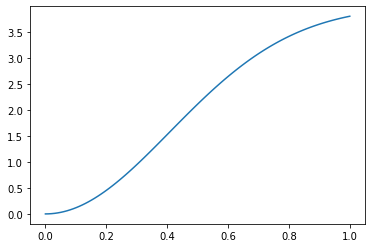

In [35]:
r = np.linspace(0,1,num=100)
s = expTrans(r) #See function definition at the top
plt.plot(r,s)

We know from figure b that:
$$
T(r=0) = 0
$$
$$
T(r=L_0) = B/2
$$
$$
T(r=\infty) = B
$$

Plugging back into the first equation and solving we get that the equation for figure b is the following:
$$
s = T(r) = \beta(1-e^{\frac{-ln(2)}{L_0^2}r^2})
$$
This is shown in the plot below

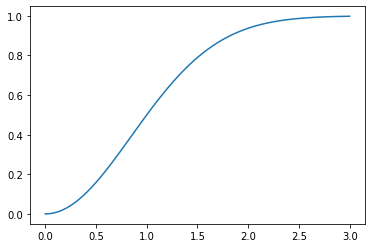

In [36]:
L0 = 1
r = np.linspace(0,3,num=100)
s = expTrans(r,alpha=(ln(2)/L0**2), beta = 1)
plt.plot(r,s)

## 3.2 (c)

The function in figure C also has the following general form:
$$
\begin{equation*}
s = T(r) = \beta(1-e^{-\alpha r^2 })
\end{equation*}
$$
We know from figure b that:
$$
T(r=0) = C
$$
$$
T(r=\infty) = D
$$
Then
$$
\beta(1-e^{-\alpha (\infty)}) = D
$$
$$
\beta(1-e^{-\infty}) = D
$$
$$
\beta(1-0) = D
$$
$$
\beta = D
$$
Therefore, the specific form of the equation for figure c is:
$$
s = T(r) = D(1-e^{-\alpha r^2}) + C
$$


3.7

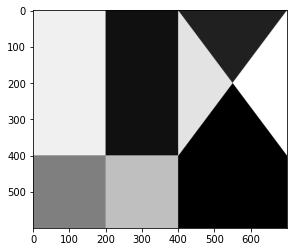

In [38]:
#Reconsgructing image
mask = np.zeros((600,700), dtype=np.uint8)
mask[0:400,0:200] = 240
mask[400:700,0:200] = 127# mask[0:20][0:10] = 255
mask[400:700,200:400] = 191
mask[0:400,200:400] = 16

pts1= np.array([[400,0], [550, 200], [400, 400]], np.int32)
pts2= np.array([[400,0], [550, 200], [700, 0]], np.int32)
pts3=  np.array([[700,0], [550, 200], [700, 400]], np.int32)
# cv2.polylines(mask, [pts], isClosed=True, color=(255, 255, 255), thickness=1)
cv2.fillPoly(mask, [pts1], color=(228, 228, 228))
cv2.fillPoly(mask, [pts2], color=(32, 32, 32))
cv2.fillPoly(mask, [pts3], color=(255, 255, 255))
# mask[]
plt.imshow(mask, cmap='gray')

Once we have the image in python we can easily find its histogram.

Histogram


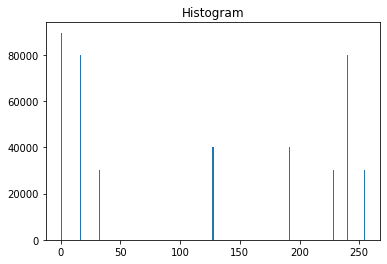

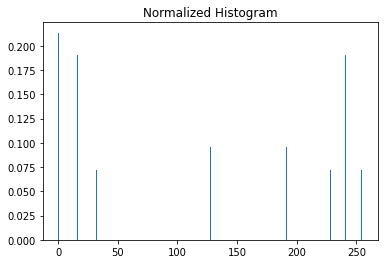

Sum of components in normalized histogram: 1.0


In [39]:
print("Histogram")
plt.hist(mask.ravel(),255,[0,255]); plt.title('Histogram');plt.show()

plt.show()
# print('Normalized Histogram')
plt.hist(mask.ravel(),255,[0,255], density=True); plt.title('Normalized Histogram'); plt.show()
histNorm,levelsNorm = np.histogram(mask.ravel(),255,[0,255], density=True)
print(f'Sum of components in normalized histogram: {np.sum(histNorm)}')